In [36]:
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import torch
import matplotlib.pyplot as plt

In [25]:
class EncoderCNN(nn.Module):
    def __init__(self,embed_size):
        super(EncoderCNN,self).__init__()
        resnet = models.resnet50(pretrained=True)
        for param in resnet.parameters():
            param.requires_grad_(False)
        modules = list(resnet.children())[:-1]
        self.resnet = nn.Sequential(*modules)
        self.embed = nn.Linear(resnet.fc.in_features,embed_size)
    def forward(self,images):
        features = self.resnet(images)
        features = features.view(features.size(0),-1)
        features = self.embed(features)
        return features

In [63]:
# image = Image.open(r"C:\Users\Sathish G\Downloads\WhatsApp Image 2024-08-16 at 5.07.10 PM.jpeg")
img = Image.open(r"C:\Users\Sathish G\Downloads\apisir.jpg")

In [64]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[.485,.456,.406],std=[.229,.224,.225])
])
image_tensor = preprocess(image).unsqueeze(0)

In [65]:
embed_size = 256
encoder = EncoderCNN(embed_size)
device = torch.device("cuda")
encoder.to(device)

C:\Users\Sathish G\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Sathish G\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [66]:
# encoder.eval()

In [67]:
img_tensor = image_tensor.to(device)

In [68]:
output = img_tensor
for name,module in encoder.resnet.named_children():
    output = module(output)
    print(f"Output after {name} : {output.shape}")

Output after 0 : torch.Size([1, 64, 112, 112])
Output after 1 : torch.Size([1, 64, 112, 112])
Output after 2 : torch.Size([1, 64, 112, 112])
Output after 3 : torch.Size([1, 64, 56, 56])
Output after 4 : torch.Size([1, 256, 56, 56])
Output after 5 : torch.Size([1, 512, 28, 28])
Output after 6 : torch.Size([1, 1024, 14, 14])
Output after 7 : torch.Size([1, 2048, 7, 7])
Output after 8 : torch.Size([1, 2048, 1, 1])


In [69]:
output = output.view(output.size(0),-1)
output = encoder.embed(output)
print(f"Final Vector shape : {output.shape}")

Final Vector shape : torch.Size([1, 256])


In [70]:
# preprocess(img).unsqueeze(0)

In [71]:
# print(image_tensor.shape)

In [72]:
img = preprocess(img).unsqueeze(0)

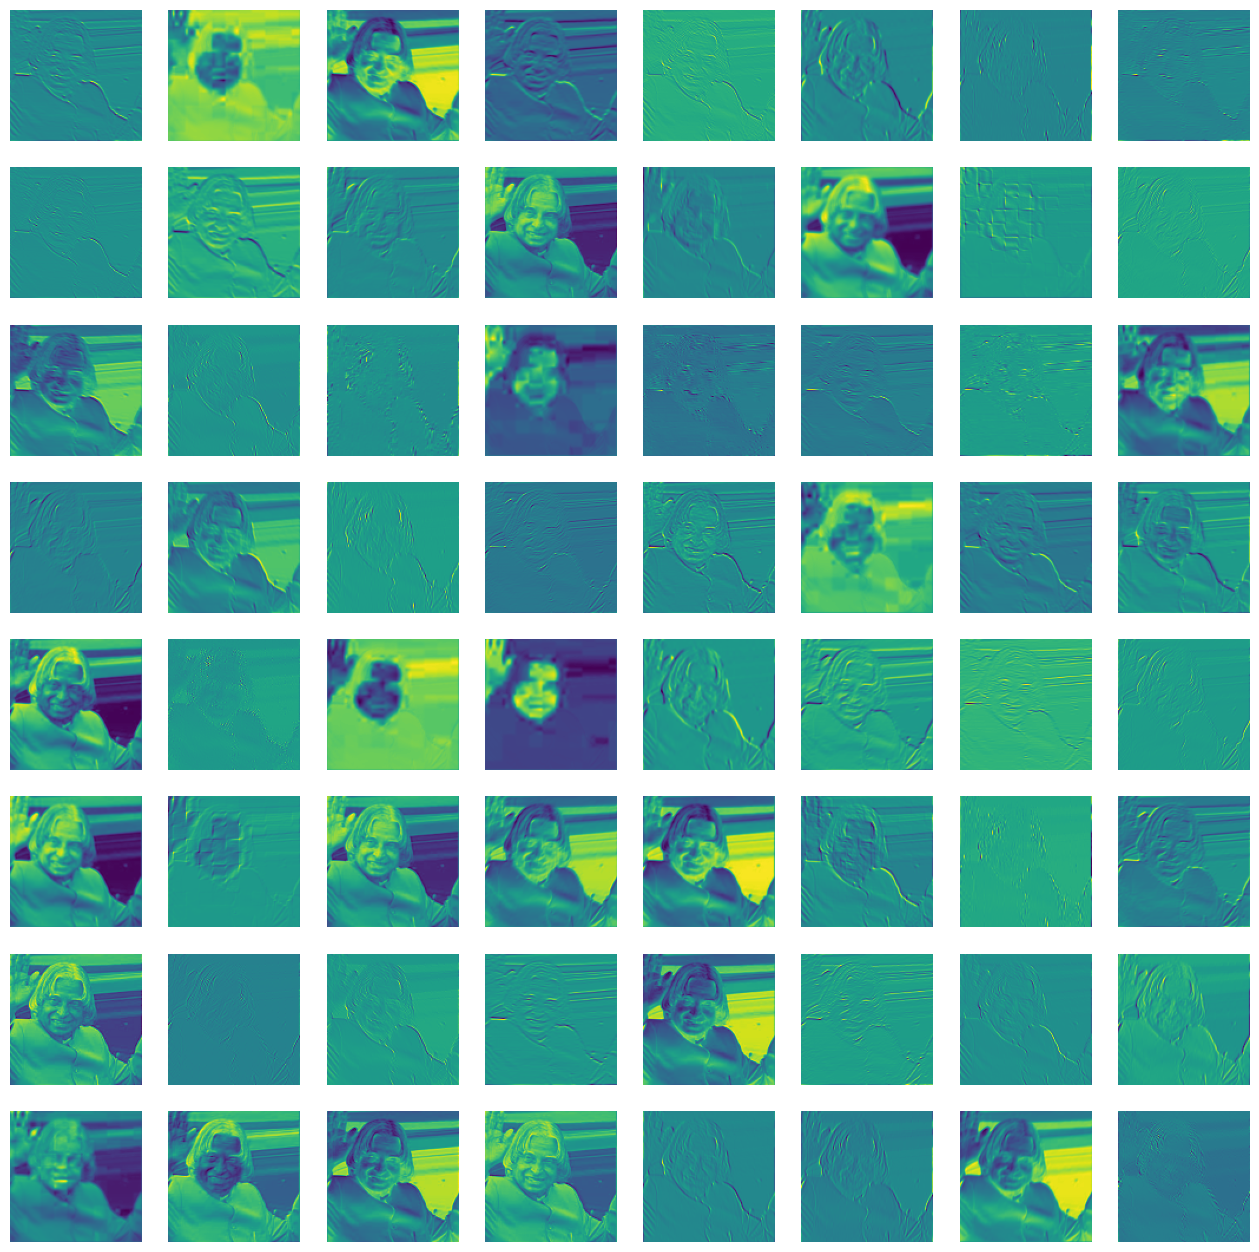

In [73]:
image_tensor = img.to(device)
output = image_tensor
feature_maps = []
for name,module in encoder.resnet.named_children():
    output = module(output)
    if isinstance(output,torch.Tensor):
        feature_maps.append(output.clone().detach())


num_features = feature_maps[0].shape[1]
fig,axs = plt.subplots(8,8,figsize=(16,16))
for i in range(8):
    for j in range(8):
        feature_map = feature_maps[0][0,i*8+j].cpu().numpy()
        axs[i,j].imshow(feature_map,cmap='viridis')
        axs[i,j].axis('off')
plt.show()

In [74]:
print("Final Output from the model",output.shape

torch.Size([1, 2048, 1, 1])